In [27]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

import time

## 1. Preparación de los datos

1. Análisis de los datos

2. Limpieza de los datos

3. Preprocesamiento de los datos

**ANALISIS DE DATOS** (Vemos que tenemos un dataset bastante limpio,
sin variables categoricas, ni datos ausentes, ni columnas sin valor, por lo que
continuamos con el dataset)

In [28]:
# Leer los datos
data = pd.read_csv('./winequality-white.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
# Obtener la cantidad total de datos y la cantidad de características (columnas)
print("\nCantidad total de datos y cantidad de características:")
print("Número total de datos:", len(data))
print("Número de características:", len(data.columns))


Cantidad total de datos y cantidad de características:
Número total de datos: 4898
Número de características: 12


In [30]:
# Ver los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(data.dtypes)


Tipos de datos de cada columna:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [31]:
# Verificar si hay valores nulos en el conjunto de datos y contarlos
print("\nCantidad de valores nulos en el conjunto de datos:")
print(data.isnull().sum())


Cantidad de valores nulos en el conjunto de datos:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [32]:
# Obtener información sobre la cantidad de valores únicos en cada columna
print("\nCantidad de valores únicos en cada columna:")
print(data.nunique())


Cantidad de valores únicos en cada columna:
fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [33]:
# Obtener una descripción estadística de las características numéricas
print("Descripción estadística de las características numéricas:")
print(data.describe())

Descripción estadística de las características numéricas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.

## 2. Separar el conjunto de datos

In [34]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento (65%) y temporal (35%)
train_data, temp_data = train_test_split(data, test_size=0.35, random_state=42)

# Dividir el conjunto temporal en validación (20%) y prueba (15%)
val_data, test_data = train_test_split(temp_data, test_size=0.42857, random_state=42)

# Definir 'quality' como la variable a predecir
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']

X_val = val_data.drop(columns=['quality'])
y_val = val_data['quality']

X_test = test_data.drop(columns=['quality'])
y_test = test_data['quality']

# Calcular el porcentaje de datos para cada conjunto
total_samples = len(data)
train_percentage = len(train_data) / total_samples * 100
val_percentage = len(val_data) / total_samples * 100
test_percentage = len(test_data) / total_samples * 100

# Verificar las formas de los conjuntos de datos resultantes
print("Forma del conjunto de entrenamiento:", X_train.shape, y_train.shape, train_percentage)
print("Forma del conjunto de validación:", X_val.shape, y_val.shape, val_percentage)
print("Forma del conjunto de prueba:", X_test.shape, y_test.shape, test_percentage)


Forma del conjunto de entrenamiento: (3183, 11) (3183,) 64.98570845242956
Forma del conjunto de validación: (980, 11) (980,) 20.00816659861168
Forma del conjunto de prueba: (735, 11) (735,) 15.00612494895876


## 3. Estandarizacion de las variables

In [35]:
from sklearn.preprocessing import StandardScaler

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Estandarizamos las características (variables predictoras) en los conjuntos de entrenamiento, validación y prueba
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## 4. Creacion de los datasets en Pytorch

In [36]:
import torch
from torch.utils.data import Dataset, DataLoader

class WineDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(np.array(y).astype(np.float32), dtype=torch.float32)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Creamos datasets para entrenamiento, validación y prueba
train_dataset = WineDataset(X_train_scaled, y_train.values)
val_dataset = WineDataset(X_val_scaled, y_val.values)
test_dataset = WineDataset(X_test_scaled, y_test.values)

## 5. Creacion de DataLoaders en Pytorch

In [37]:
# Creamos dataloaders para facilitar el manejo de lotes de datos
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

# Vemos un batch de datos (un consiste en 64 ejemplos de datos)
for i_batch, (x_train, y_train) in enumerate(train_dataloader):
    print("número de batch :", i_batch)
    print("x_train en i_batch : ", x_train.size())
    print("y_train en i_batch :", y_train.size())
    break


número de batch : 0
x_train en i_batch :  torch.Size([64, 11])
y_train en i_batch : torch.Size([64])


## 6. Definicion del modelo

In [38]:
# Define the model
class WineQualityModel(nn.Module):

    #Initializar las capas
    def __init__(self, input_shape):
        super(WineQualityModel, self).__init__()
        self.fc1 = nn.Linear(input_shape, 64) 
        self.fc2 = nn.Linear(64, 32) # 16, 32
        self.fc3 = nn.Linear(32, 1) # 32, 1

    # Implementar estas operaciones en los datos de entrada
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # x = torch.sigmoid(self.fc3(x))
        return x

In [39]:
# Especificar que queremos usar una GPU si está disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Initializar el modelo
model = WineQualityModel(input_shape=X_train_scaled.shape[1]).to(device)
print(model)

cpu
WineQualityModel(
  (fc1): Linear(in_features=11, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


## 7. Especificacion de hiperparametros

In [40]:
epochs = 10           # Número de épocas
learning_rate = 0.01 # Tasa de aprendizaje

## 8. Funcion de coste

In [41]:
import torch.nn as nn

# Especificar la función de pérdida
criterion = nn.MSELoss()

## 9. Seleccion del optimizador

In [42]:
# Crear una instancia del optimizador
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

## 10. Funcion de entrenamiento

In [43]:
def train_model(model, optimizer, criterion, train_dataloader, val_dataloader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Establecer el modelo en modo de entrenamiento
        
        train_loss = 0.0
        
        # Iterar sobre los lotes de datos de entrenamiento
        for inputs, targets in train_dataloader:
            # Poner los datos en el dispositivo adecuado (GPU si está disponible)
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Reiniciar los gradientes
            optimizer.zero_grad()
            
            # Realizar la pasada hacia adelante y obtener las predicciones
            outputs = model(inputs)
            
            # Calcular la pérdida
            loss = criterion(outputs, targets)
            
            # Realizar la pasada hacia atrás y optimizar los pesos
            loss.backward()
            optimizer.step()
            
            # Calcular la pérdida total del entrenamiento
            train_loss += loss.item() * inputs.size(0)
        
        # Calcular la pérdida media del entrenamiento
        train_loss = train_loss / len(train_dataloader.dataset)
        
        # Evaluar el modelo en el conjunto de validación
        model.eval()  # Establecer el modelo en modo de evaluación
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, targets in val_dataloader:
                inputs, targets = inputs.to(device), targets.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                val_loss += loss.item() * inputs.size(0)
        
        val_loss = val_loss / len(val_dataloader.dataset)
        
        # Imprimir la pérdida del entrenamiento y validación en cada época
        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'
              .format(epoch+1, num_epochs, train_loss, val_loss))


## 11. Funcion de validacion

In [44]:
def validate_model(model, criterion, val_dataloader):
    model.eval()  # Establecer el modelo en modo de evaluación
    val_loss = 0.0
    
    # Desactivar el cálculo de gradientes durante la validación
    with torch.no_grad():
        for inputs, targets in val_dataloader:
            # Poner los datos en el dispositivo adecuado (GPU si está disponible)
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Realizar la pasada hacia adelante y obtener las predicciones
            outputs = model(inputs)
            
            # Calcular la pérdida
            loss = criterion(outputs, targets)
            
            # Sumar la pérdida total del conjunto de validación
            val_loss += loss.item() * inputs.size(0)
    
    # Calcular la pérdida promedio del conjunto de validación
    val_loss = val_loss / len(val_dataloader.dataset)
    
    return val_loss


## 12. Creacion del bucle de validacion y entrenamiento

In [45]:
# Definir listas para almacenar las pérdidas de entrenamiento y validación
train_losses = []
val_losses = []

# Bucle de entrenamiento y validación
for epoch in range(epochs):
    model.train()  # Establecer el modelo en modo de entrenamiento
    
    train_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss = train_loss / len(train_dataloader.dataset)
    
    val_loss = validate_model(model, criterion, val_dataloader)
    
    # Almacenar las pérdidas de entrenamiento y validación en las listas
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'
          .format(epoch+1, epochs, train_loss, val_loss))



Epoch [1/10], Train Loss: 26.4128, Val Loss: 24.9690
Epoch [2/10], Train Loss: 24.6866, Val Loss: 24.7077
Epoch [3/10], Train Loss: 24.5696, Val Loss: 24.6584


c:\Users\hugoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\hugoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([47])) that is different to the input size (torch.Size([47, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\hugoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incor

Epoch [4/10], Train Loss: 24.5389, Val Loss: 24.6395
Epoch [5/10], Train Loss: 24.5253, Val Loss: 24.6298
Epoch [6/10], Train Loss: 24.5179, Val Loss: 24.6240
Epoch [7/10], Train Loss: 24.5133, Val Loss: 24.6202
Epoch [8/10], Train Loss: 24.5102, Val Loss: 24.6176
Epoch [9/10], Train Loss: 24.5079, Val Loss: 24.6156
Epoch [10/10], Train Loss: 24.5063, Val Loss: 24.6141


## 14. Evaluacion

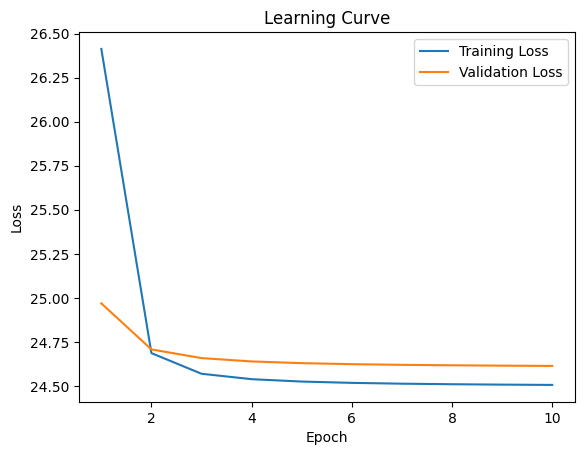

In [46]:
# Trazar la curva de aprendizaje
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

## 14. Funcion para las predicciones

In [47]:
def evaluate_model(model, criterion, dataloader):
    model.eval()  # Establecer el modelo en modo de evaluación
    total_loss = 0.0
    total_samples = 0
    
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            total_loss += loss.item() * inputs.size(0)
            total_samples += inputs.size(0)
    
    avg_loss = total_loss / total_samples
    return avg_loss

# Utilizar la función evaluate_model para obtener el error en el conjunto de prueba
test_loss = evaluate_model(model, criterion, test_dataloader)
print('Test Loss: {:.4f}'.format(test_loss))


Test Loss: 24.9109


c:\Users\hugoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## 16. Evaluacion de la prediccion

Podemos observar que la prediccion tiene un 24.91% de perdida, lo que nos
indica que es una cifra elevada y las predicciones no son los mas acertadas
posibles. Deberiamos revisar el modelo para poder detectar mejoras en el codigo
y que la prediccion tenga un porcentaje de exito mayor.